<a href="https://colab.research.google.com/github/WhatNowKhush/screwed/blob/main/Dunkin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import io
from google.colab import files

# Upload the file
uploaded = files.upload()

# Get the first uploaded file name
file_name = list(uploaded.keys())[0]

# Load the data
data = pd.read_csv(io.BytesIO(uploaded[file_name]))

# Display the first few rows of the DataFrame
print(data.head())

Saving MOCK_DATA.csv to MOCK_DATA (4).csv
   product_id product_name              category  price purchase_date  \
0           1          Mrs                coffee   9.01     10/5/2021   
1           2          Rev                coffee   4.65      5/2/2021   
2           3           Dr                donuts   2.47     3/29/2021   
3           4          Rev  breakfast sandwiches   6.77      2/7/2021   
4           5           Mr  breakfast sandwiches   7.70    10/28/2021   

   customer_id     customer_name  rating  \
0            1   Webster Everley       5   
1            2     Duke Manifold       3   
2            3       Tessa Balke       3   
3            4  Julianne Goodsir       3   
4            5     Kelcey Twiddy       1   

                                              review  purchase_quantity  
0  Cras mi pede, malesuada in, imperdiet et, comm...                  4  
1  Vestibulum ac est lacinia nisi venenatis trist...                  8  
2  Nam congue, risus semper port

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         1000 non-null   int64  
 1   product_name       1000 non-null   object 
 2   category           1000 non-null   object 
 3   price              1000 non-null   float64
 4   purchase_date      1000 non-null   object 
 5   customer_id        1000 non-null   int64  
 6   customer_name      1000 non-null   object 
 7   rating             1000 non-null   int64  
 8   review             1000 non-null   object 
 9   purchase_quantity  1000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB
None
        product_id        price  customer_id       rating  purchase_quantity
count  1000.000000  1000.000000  1000.000000  1000.000000        1000.000000
mean    500.500000     5.845480   500.500000     3.027000           5.629000
std     288.819436 

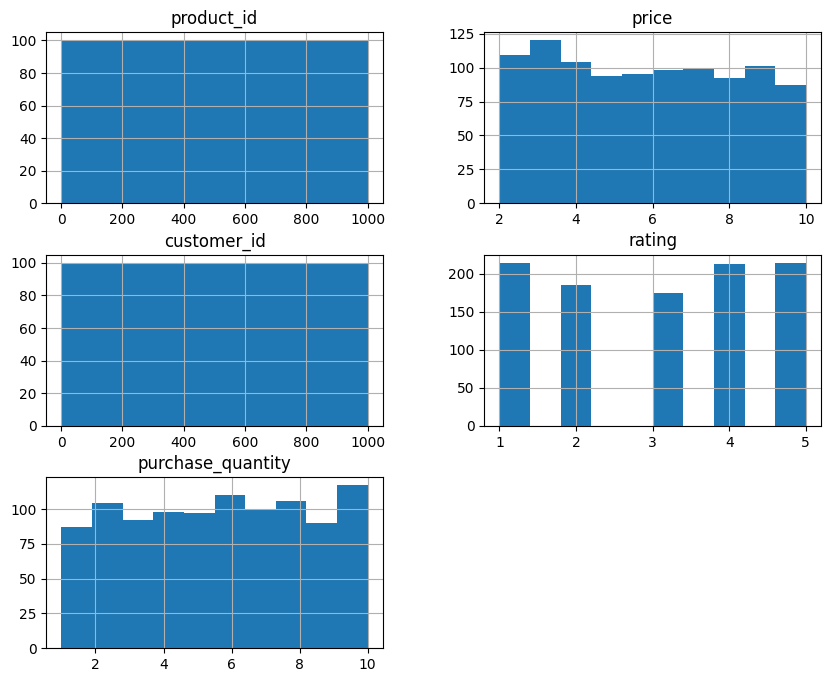

In [9]:
# Basic information about the dataset
print(data.info())

# Statistical summary of the numerical variables
print(data.describe())

# Visualize distributions and relationships in the data
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms of the features
data.hist(figsize=(10, 8))
plt.show()


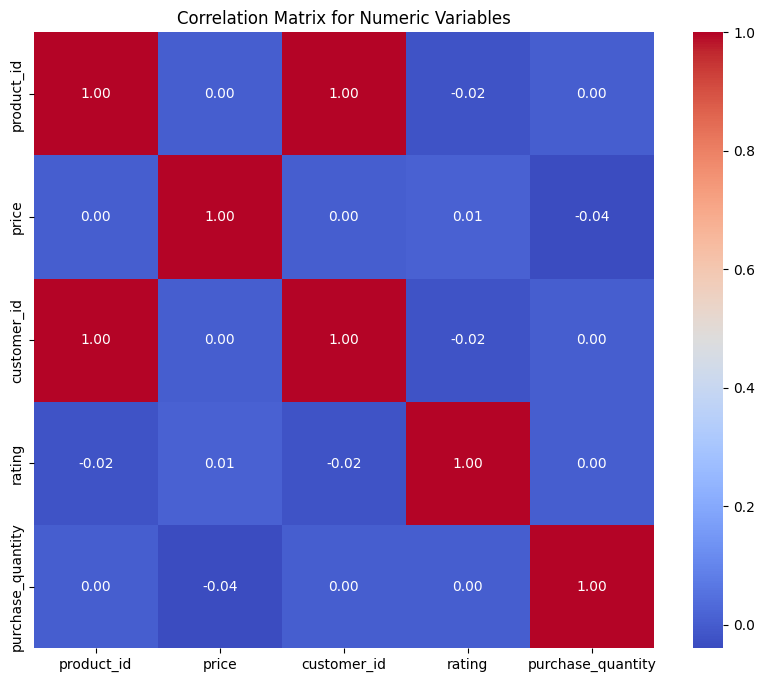

In [13]:
import numpy as np
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')  # Using 'coolwarm' colormap for better visualization
plt.title('Correlation Matrix for Numeric Variables')
plt.show()

In [17]:
# Convert 'purchase_date' to datetime format
data['purchase_date'] = pd.to_datetime(data['purchase_date'])

# Print the first few rows to confirm changes
print(data.head())

   product_id product_name              category  price purchase_date  \
0           1          Mrs                coffee   9.01    2021-10-05   
1           2          Rev                coffee   4.65    2021-05-02   
2           3           Dr                donuts   2.47    2021-03-29   
3           4          Rev  breakfast sandwiches   6.77    2021-02-07   
4           5           Mr  breakfast sandwiches   7.70    2021-10-28   

   customer_id     customer_name  rating  \
0            1   Webster Everley       5   
1            2     Duke Manifold       3   
2            3       Tessa Balke       3   
3            4  Julianne Goodsir       3   
4            5     Kelcey Twiddy       1   

                                              review  purchase_quantity  
0  Cras mi pede, malesuada in, imperdiet et, comm...                  4  
1  Vestibulum ac est lacinia nisi venenatis trist...                  8  
2  Nam congue, risus semper porta volutpat, quam ...                  7  


product_id           0
product_name         0
category             0
price                0
purchase_date        0
customer_id          0
customer_name        0
rating               0
review               0
purchase_quantity    0
dtype: int64
        product_id        price               purchase_date  customer_id  \
count  1000.000000  1000.000000                        1000  1000.000000   
mean    500.500000     5.845480  2021-06-30 12:41:45.600000   500.500000   
min       1.000000     2.000000         2021-01-01 00:00:00     1.000000   
25%     250.750000     3.717500         2021-04-05 00:00:00   250.750000   
50%     500.500000     5.840000         2021-07-06 00:00:00   500.500000   
75%     750.250000     7.862500         2021-09-23 00:00:00   750.250000   
max    1000.000000     9.990000         2021-12-30 00:00:00  1000.000000   
std     288.819436     2.319167                         NaN   288.819436   

            rating  purchase_quantity  
count  1000.000000        1000.0

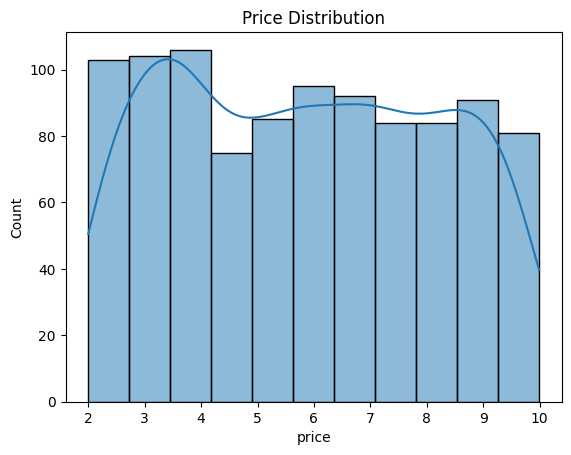

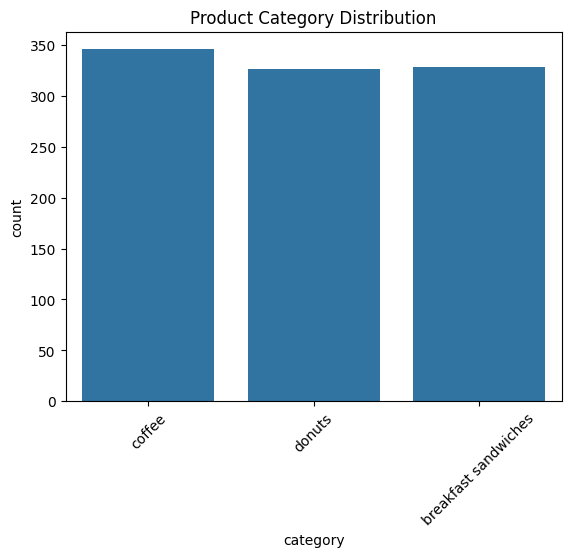

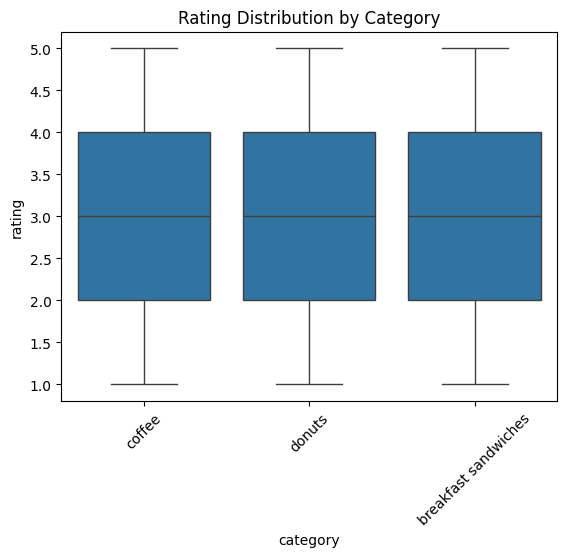

In [18]:
# Checking for missing values
print(data.isnull().sum())

# Summary statistics for numerical variables
print(data.describe())

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of price
sns.histplot(data['price'], kde=True)
plt.title('Price Distribution')
plt.show()

# Bar plot for category variable
sns.countplot(x='category', data=data)
plt.title('Product Category Distribution')
plt.xticks(rotation=45)
plt.show()

# Boxplot to see ratings distribution across categories
sns.boxplot(x='category', y='rating', data=data)
plt.title('Rating Distribution by Category')
plt.xticks(rotation=45)
plt.show()


In [19]:
# Example: Creating a feature for the total spend per transaction
data['total_spend'] = data['price'] * data['purchase_quantity']

# Optionally, encode categorical data if you're preparing for machine learning
data = pd.get_dummies(data, columns=['category'], drop_first=True)


In [20]:
from sklearn.model_selection import train_test_split

# Define your feature set and target variable
X = data[['price', 'rating', 'purchase_quantity', 'total_spend']]  # add more features as needed
y = data['rating']  # example target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.0
